In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Basic 1b

In Stata we run
```stata
statsby _b _se N=e(N) N_clust=e(N_clust), by(tArea) ///
	saving("${taboutdir}/2. OLS/OLS_Basic1b_`set'_`dvar'_`samp'", replace): ///
	reg `dvar' ib2010.year ///
	ib11.tUni ///
	ib4.Type ///
	math math2 read read2 ///
	exp exp2   ///
	if `samp'==1 & `set'==1 & admit==1, cluster(${rutname}) baselevels
```

Below we plot math and read coefficients:

In [2]:
import numpy as np;
import seaborn as sns;
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import os

In [3]:
estsdir = '../estimations'
Area_labels = ["Business and Administration", 
               "Agriculture", 
               "Architecture and Art", 
               "Natural Sciences", 
               "Social Sciences", 
               "Law", 
               "Education", 
               "Humanities", 
               "Health", 
               "Technology"]

In [4]:
df = pd.read_stata(os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta'))

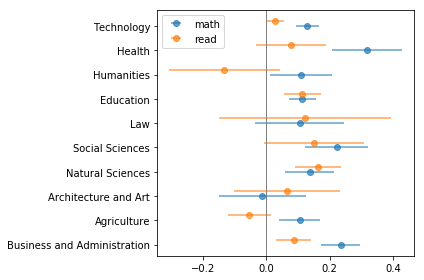

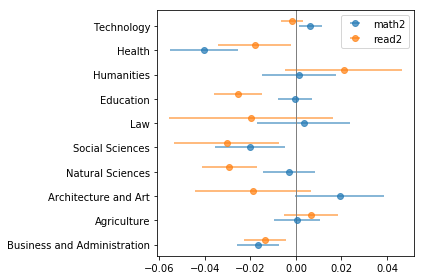

<Figure size 432x288 with 0 Axes>

In [5]:
# Import data
os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta')
df = pd.read_stata(os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta'))
itr = pd.read_stata(os.path.join(estsdir,'OLS_Basic1b_All_ltotinc_tc_All.dta'), iterator = True)
itr.variable_labels()
df.reset_index(inplace=True)
# Plot coefficients
for degree in ['','2']:
    # math and read in same graph:
    for idx,coef in enumerate(['math', 'read']):
        plt.errorbar(df['_b_'+coef+degree], df.index+idx/5, xerr=df['_se_'+coef+degree]*1.96, marker='o', ls='none', label=coef+degree, alpha=0.7)
        plt.axvline(x=0, linewidth=1, color='grey')
        plt.yticks(df.index, Area_labels)
        plt.legend()
        plt.tight_layout()
    plt.show()
    #plt.savefig(figsdir+'OLS_Basic1b_mathread{0}.pdf'.format(degree), format='pdf')
    plt.clf()